# Chapter 5: Monte Carlo Methods
---

**Chapter Overview**: This chapter introduces Monte Carlo (MC) methods, which learn directly from episodes of experience without requiring a model of the environment's dynamics. Unlike DP, MC methods don't bootstrap (they don't update estimates based on other estimates), instead waiting until an episode ends to update values based on actual returns. This makes them particularly useful when we don't have a perfect model of the environment.

**Key Advantages of MC over DP**:
1. Can learn from actual experience (model-free)
2. Can learn from simulated experience  
3. Simple and easy to understand
4. Less harmed by violations of Markov property
5. Can focus on specific states of interest

**Connection to MCTS**: Monte Carlo Tree Search (MCTS), used in AlphaGo, builds on these MC principles by using simulated rollouts to estimate action values in game trees.

---

## 5.1 Monte Carlo Prediction

**Core Idea**: Estimate the value of a state by averaging the actual returns observed after visits to that state.

### Visit Types

**First-visit MC**: Estimates $v_\pi(s)$ as the average of returns following *first* visits to $s$ in each episode.

**Every-visit MC**: Estimates $v_\pi(s)$ as the average of returns following *all* visits to $s$.

**Mathematical Foundation**: Both converge to $v_\pi(s)$ as number of visits → ∞
- First-visit: Each return is i.i.d. with finite variance → law of large numbers
- Standard error falls as $1/\sqrt{n}$ where $n$ = number of returns

### First-visit MC Algorithm

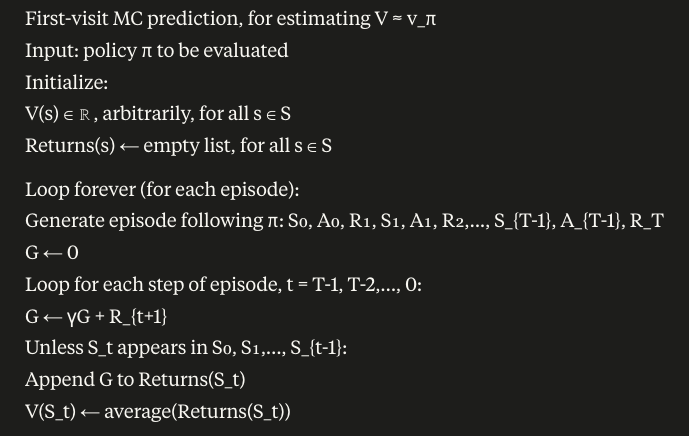

**Intuition**: We're computing returns by working backwards through the episode, accumulating discounted rewards. Only the first occurrence of each state gets its return recorded.

### Example 5.1: Blackjack

**Setup**:
- Goal: Get cards summing close to 21 without going over
- States: (player sum, dealer showing, usable ace)
- Actions: hit or stick
- Rewards: +1 win, -1 loss, 0 draw
- Policy example: Stick on 20 or 21, otherwise hit

![Blackjack Value Function](../img/fig5_1.png)

**Key Insight**: MC can easily handle this problem even though computing transition probabilities for DP would be complex.

### Backup Diagrams for MC

![MC Backup Diagram](../img/fig5_2.png)

**MC vs DP Backup Diagrams**:
- **DP**: Shows all possible transitions (breadth)
- **MC**: Shows one sampled episode trajectory (depth)
- **MC doesn't bootstrap**: Each state's estimate is independent

**Important Property**: MC can estimate individual state values without computing values for all states - useful for focusing on states of interest.

### Example 5.2: Soap Bubble 

**Problem**: Find shape of soap film on wire frame
- Shape property: Height at each point = average of neighboring heights
- MC solution: Random walk from point until hitting boundary, average boundary heights

**Connection**: This is actually solving a Dirichlet boundary value problem - shows MC methods apply beyond RL!

---

## 5.2 Monte Carlo Estimation of Action Values

**Key Challenge**: Without a model, we need $q_\pi(s,a)$ not just $v_\pi(s)$ to improve policy.

**Problem of Maintaining Exploration**: 
- If π is deterministic, many state-action pairs never visited
- No returns to average → no improvement for those actions

**Solution - Exploring Starts**: 
- Randomly select starting state-action pair
- Ensures all pairs visited infinitely often (in limit)
- Not always realistic in practice

---

## 5.3 Monte Carlo Control

**Approach**: Use Generalized Policy Iteration (GPI) with MC evaluation

![GPI Diagram](../img/fig5_3.png)

### Monte Carlo ES (Exploring Starts)

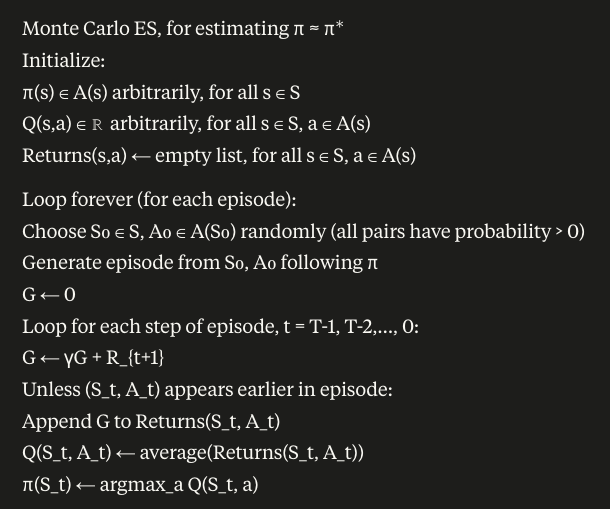

**Key Properties**:
- Alternates between evaluation and improvement
- Policy becomes greedy w.r.t. current Q
- Converges to optimal (though not formally proved)

### Example 5.3: Solving Blackjack

![Optimal Blackjack Policy](../img/fig5_2.png)

**Result**: Optimal policy found matches "basic strategy" with one exception

---

## 5.4 Monte Carlo Control without Exploring Starts

**Problem**: Exploring starts often unrealistic

**Solution**: Use **ε-soft policies**
- $\pi(a|s) \geq \frac{\varepsilon}{|A(s)|}$ for all $s,a$
- Ensures continued exploration

### ε-greedy Policies

**Definition**:
- Probability $\frac{\varepsilon}{|A(s)|}$ for non-greedy actions
- Probability $1 - \varepsilon + \frac{\varepsilon}{|A(s)|}$ for greedy action

### On-policy First-visit MC Control

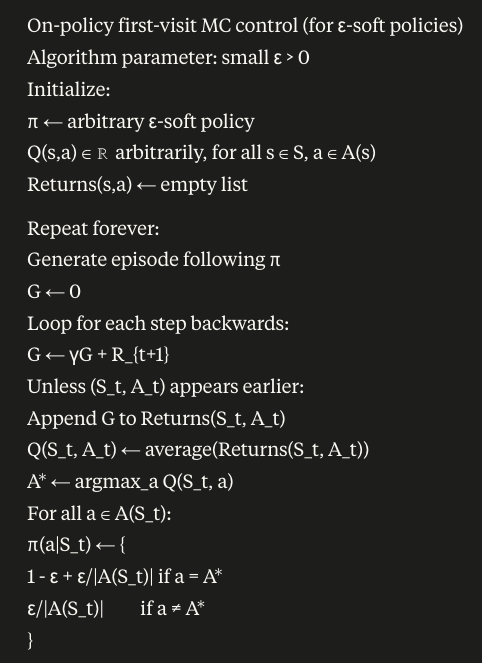

**Policy Improvement Theorem Still Applies**: Any ε-greedy policy w.r.t. $q_\pi$ is guaranteed to be better than or equal to π.

---

## 5.5 Off-policy Prediction via Importance Sampling

**Off-policy Learning**: Learn about target policy π while following behavior policy b

**Requirements**:
- **Coverage**: $\pi(a|s) > 0 \implies b(a|s) > 0$
- b must be stochastic where it differs from π

### Importance Sampling Ratio

**🏆 FOUNDATIONAL FORMULA** (_Equation 5.3_):
$$\rho_{t:T-1} = \prod_{k=t}^{T-1} \frac{\pi(A_k|S_k)}{b(A_k|S_k)}$$

**Components**:
- $\pi(A_k|S_k)$: Probability under target policy
- $b(A_k|S_k)$: Probability under behavior policy
- Product over all steps from $t$ to episode end

**Key Insight**: State transition probabilities cancel out - ratio depends only on policies!

### Ordinary Importance Sampling

**Formula** (_Equation 5.5_):
$$V(s) = \frac{\sum_{t \in \mathcal{T}(s)} \rho_{t:T(t)-1}G_t}{|\mathcal{T}(s)|}$$

**Properties**:
- Unbiased but possibly infinite variance
- Can produce extreme estimates

### Weighted Importance Sampling

**🏆 FOUNDATIONAL FORMULA** (_Equation 5.6_):
$$V(s) = \frac{\sum_{t \in \mathcal{T}(s)} \rho_{t:T(t)-1}G_t}{\sum_{t \in \mathcal{T}(s)} \rho_{t:T(t)-1}}$$

**Properties**:
- Biased (but bias → 0 asymptotically)
- Always finite variance (preferred in practice)
- Largest weight on any return is 1

### Example 5.4: Off-policy Blackjack Estimation

![Off-policy Estimation Comparison](../img/fig5_3.png)

**Result**: Weighted importance sampling has much lower initial error

### Example 5.5: Infinite Variance

**Setup**: Single state, two actions (left/right)
- Target policy: Always left
- Behavior policy: 50/50 left/right
- Left loops back with p=0.9, terminates with reward +1 with p=0.1

![Infinite Variance Example](../img/fig5_4.png)

**Key Point**: Ordinary importance sampling can have infinite variance when trajectories have loops!

---

## 5.6 Incremental Implementation

### Incremental Update for Weighted Importance Sampling

**Update Rule** (_Equation 5.8_):
$$V_{n+1} = V_n + \frac{W_n}{C_n}[G_n - V_n]$$

where:
- $C_{n+1} = C_n + W_{n+1}$ (cumulative sum of weights)
- $W_n = \rho_{t:T(t)-1}$ (importance sampling ratio)

### Off-policy MC Prediction Algorithm

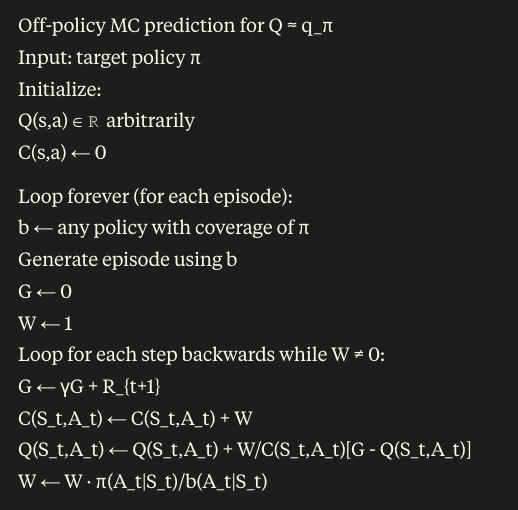

---

## 5.7 Off-policy Monte Carlo Control

### Algorithm Structure

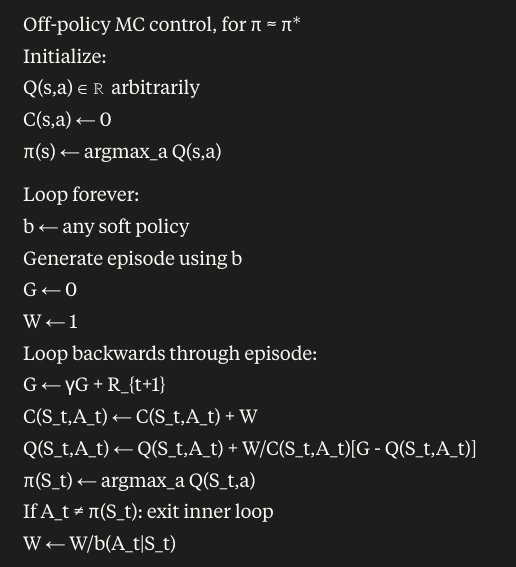

**Key Limitation**: Only learns from tail of episodes where all actions are greedy

---

## 5.8 *Discounting-aware Importance Sampling

**Problem**: When γ < 1, importance sampling ratios include irrelevant factors

**Example**: If γ = 0, return is just $R_1$, but ordinary IS uses product of 100 ratios!

**Solution**: Think of discounting as probability of termination

**Flat Partial Returns**:
$$\bar{G}_{t:h} = R_{t+1} + R_{t+2} + ... + R_h$$

**Discounting-aware Estimators** (_Equations 5.9-5.10_):
- Break return into weighted sum of flat partial returns
- Use truncated importance sampling ratios
- Reduces variance when γ < 1

---

## 5.9 *Per-decision Importance Sampling

**Key Insight**: For return component $\gamma^{k-t-1}R_{t+k}$, only need IS ratio up to time $t+k-1$

**Alternative Return**:
$$\tilde{G}_t = \rho_{t:t}R_{t+1} + \gamma\rho_{t:t+1}R_{t+2} + \gamma^2\rho_{t:t+2}R_{t+3} + ...$$

**Per-decision Estimator** (_Equation 5.15_):
$$V(s) = \frac{\sum_{t \in \mathcal{T}(s)} \tilde{G}_t}{|\mathcal{T}(s)|}$$

**Note**: No consistent per-decision version of weighted importance sampling exists yet.

---

## Summary

**Monte Carlo methods**:
- Learn from complete episodes
- Don't require environment model
- Don't bootstrap (estimates are independent)
- Can focus on states of interest

**Key algorithms**:
- MC prediction (first-visit/every-visit)
- MC ES (with exploring starts)
- On-policy MC control (ε-soft)
- Off-policy MC (importance sampling)

**Tradeoffs**:
- **On-policy**: Simpler but limited to exploring policies
- **Off-policy**: Can learn optimal deterministic policy but higher variance

**Open problems**:
- Formal convergence proof for MC ES
- Consistent per-decision weighted importance sampling

---

## Exercises

### Exercise 5.1
**Q**: Why does estimated value jump for last two rows in rear? Why drop for last row on left? Why are frontmost values higher in upper diagrams?

**A**: 
- **Jump in last two rows (rear)**: Player sums 20-21 have high value because policy sticks (avoiding bust)
- **Drop in last row (left)**: When dealer shows ace, player's chances decrease significantly
- **Higher frontmost values (upper)**: With usable ace, player can take more risks without busting, leading to higher expected returns

### Exercise 5.2
**Q**: Would every-visit MC results differ much from first-visit on blackjack?

**A**: Not significantly. In blackjack, states rarely repeat within episodes (each deal changes the state), so first-visit ≈ every-visit. Any differences would be minimal and both would converge to same values.

### Exercise 5.3
**Q**: What is the backup diagram for MC estimation of $q_\pi$?

**A**: Similar to state-value backup, but:
- Root node is a state-action pair (s,a) 
- Shows full trajectory starting from taking action a in state s
- Includes all rewards until episode termination
- No bootstrapping from other action values

### Exercise 5.4
**Q**: Make incremental version of MC ES algorithm.

**A**:
```python
# Replace the averaging step with:
N(S_t, A_t) ← N(S_t, A_t) + 1  # count visits
Q(S_t, A_t) ← Q(S_t, A_t) + 1/N(S_t, A_t) * [G - Q(S_t, A_t)]
```

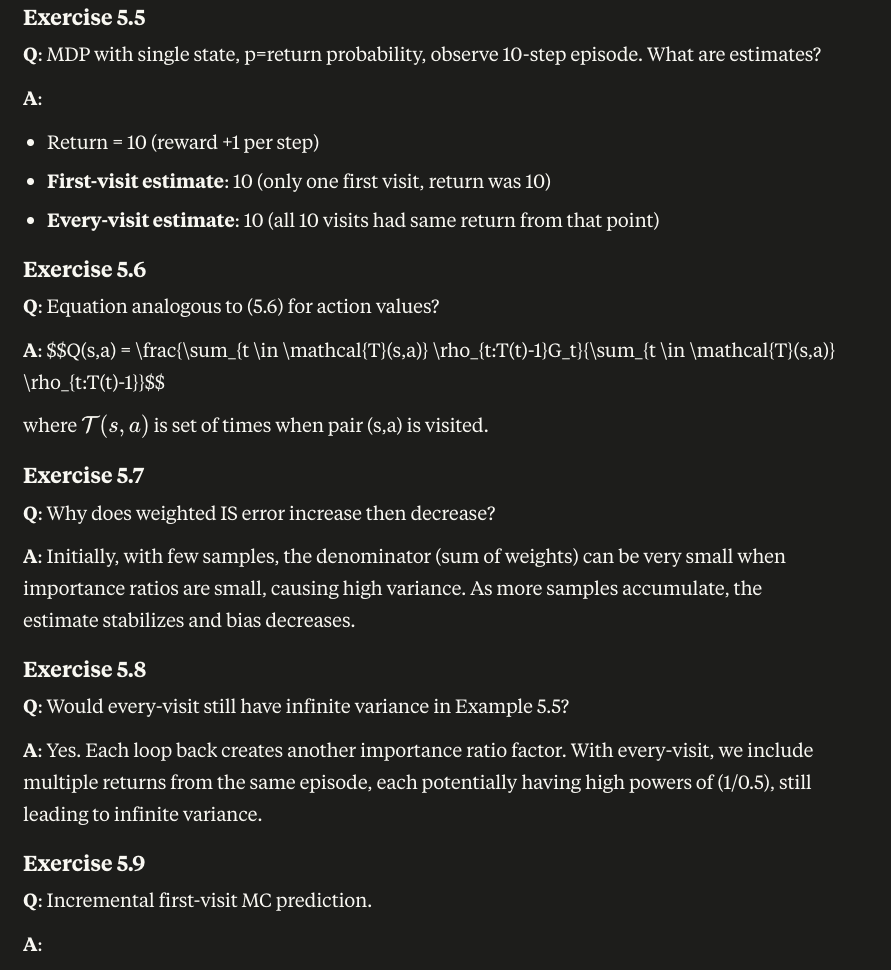

# After calculating G for state S_t:

```python
if S_t not in visited_states:
    N(S_t) ← N(S_t) + 1
    V(S_t) ← V(S_t) + 1/N(S_t) * [G - V(S_t)]
    visited_states.add(S_t)
```

### Exercise 5.10
Q: Derive weighted-average update rule (5.8) from (5.7).
A: Starting from:

$V_n=\frac{\sum_{k=1}^{n-1} W_k G_k}{\sum_{k=1}^{n-1} W_k}=\frac{\sum_{k=1}^{n-1} W_k G_k}{C_{n-1}}$

For $V_{n+1}$:

$V_{n+1}=\frac{\sum_{k=1}^n W_k G_k}{C_n}=\frac{C_{n-1} V_n+W_n G_n}{C_{n-1}+W_n}$

Rearranging:

$V_{n+1}=V_n+\frac{W_n}{C_n}\left(G_n-V_n\right)$

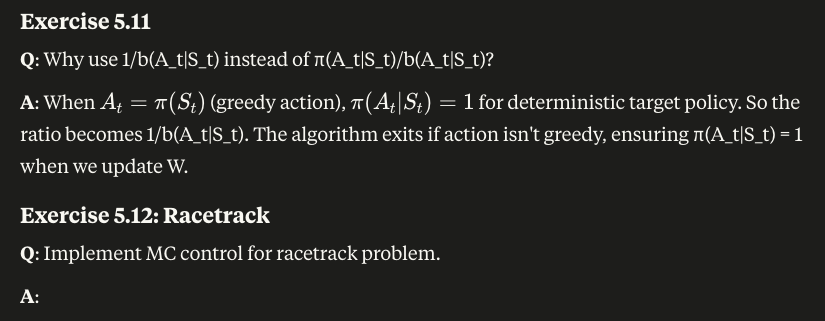

```python
def racetrack_mc_control(episodes=10000):
    # Initialize Q(s,a) and C(s,a) for all states and actions
    Q = defaultdict(lambda: np.zeros(9))  # 9 actions
    C = defaultdict(lambda: np.zeros(9))
    
    for episode in range(episodes):
        # Generate episode with exploring starts
        trajectory = generate_episode()
        G = 0
        
        # Work backwards through episode
        for t in range(len(trajectory)-1, -1, -1):
            s, a, r = trajectory[t]
            G = gamma * G + r
            
            # First-visit check
            if (s, a) not in [(x[0], x[1]) for x in trajectory[:t]]:
                C[s][a] += 1
                Q[s][a] += (G - Q[s][a]) / C[s][a]
    
    # Extract optimal policy
    policy = {}
    for s in Q:
        policy[s] = np.argmax(Q[s])
    
    return policy, Q
```

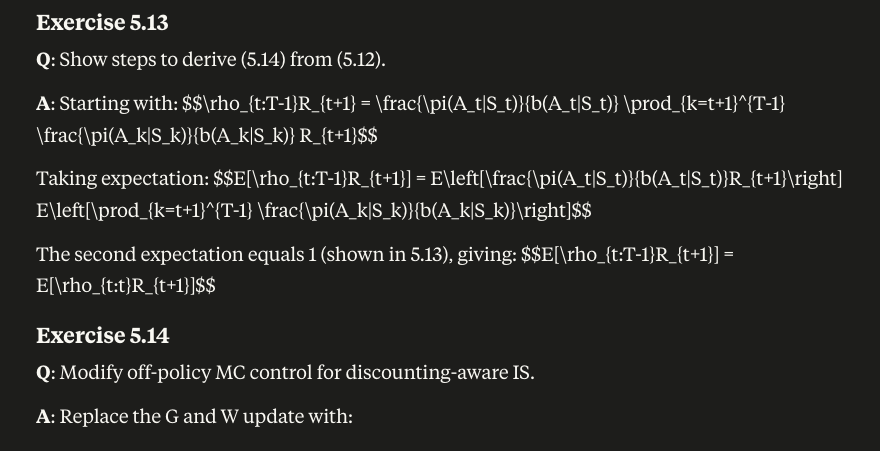

```python
# Compute flat partial returns and weights
for h in range(t+1, T):
    G_bar = sum(R[t+1:h+1])  # Flat partial return
    W_h = importance_ratio(t, h-1)
    
    # Accumulate discounting-aware update
    update += (1-gamma) * gamma**(h-t-1) * W_h * G_bar

# Final term
G_bar_T = sum(R[t+1:])
W_T = importance_ratio(t, T-1)
update += gamma**(T-t-1) * W_T * G_bar_T
```

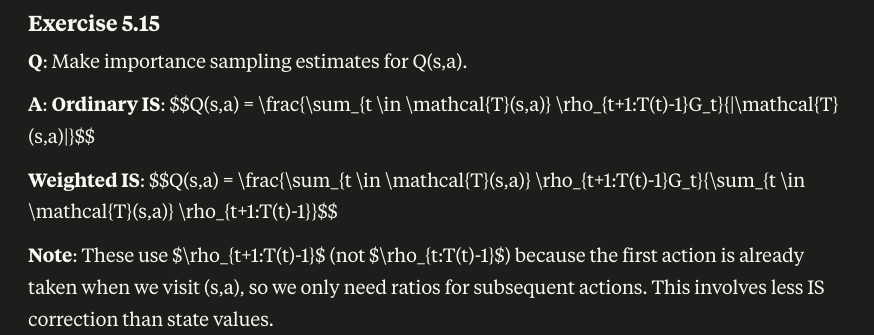